## WEEK 10 - Assignment

In [8]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Read the Dataset

In [9]:
import pandas as pd

BBBY_price = pd.read_csv(r'C:\DSP\WE_10\BBBY.csv')

BBBY_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-25,16.83,17.51,16.26,17.280001,17.280001,4856100
1,2022-04-26,17.09,17.25,15.50,15.610000,15.610000,4038300
2,2022-04-27,15.68,15.68,14.66,14.670000,14.670000,4024400
3,2022-04-28,14.83,14.90,13.82,14.750000,14.750000,5485700
4,2022-04-29,14.59,14.89,13.55,13.610000,13.610000,4607000


In [10]:
BBBY_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-25,16.83,17.51,16.26,17.280001,17.280001,4856100
1,2022-04-26,17.09,17.25,15.50,15.610000,15.610000,4038300
2,2022-04-27,15.68,15.68,14.66,14.670000,14.670000,4024400
3,2022-04-28,14.83,14.90,13.82,14.750000,14.750000,5485700
4,2022-04-29,14.59,14.89,13.55,13.610000,13.610000,4607000
...,...,...,...,...,...,...,...
245,2023-04-17,0.24,0.32,0.24,0.280000,0.280000,336553900
246,2023-04-18,0.32,0.35,0.30,0.340000,0.340000,307225700
247,2023-04-19,0.42,0.56,0.40,0.460000,0.460000,962558800
248,2023-04-20,0.37,0.40,0.28,0.300000,0.300000,343062500


In [11]:
#Drop the columns we don't need

BBBY_price = BBBY_price.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [12]:
BBBY_price

,Date,Close
0,2022-04-25,17.280001
1,2022-04-26,15.610000
2,2022-04-27,14.670000
3,2022-04-28,14.750000
4,2022-04-29,13.610000
...,...,...
245,2023-04-17,0.280000
246,2023-04-18,0.340000
247,2023-04-19,0.460000
248,2023-04-20,0.300000


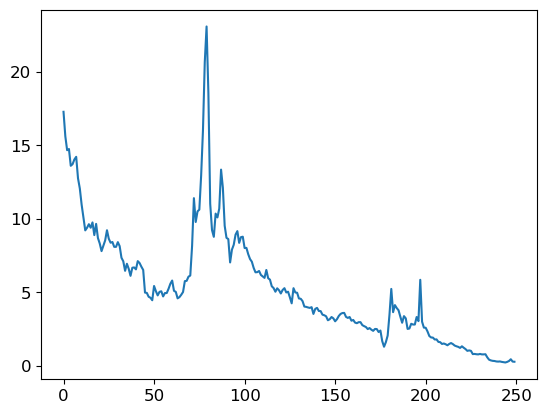

In [13]:
#Plot temp

plt.plot(BBBY_price['Close'])
plt.show()

In [14]:
# Remove all null values

BBBY_price = BBBY_price.dropna().reset_index(drop=True)

## RESHAPE the data set!

In [15]:
BBBY_price.shape

(250, 2)

In [16]:
# Note that not all days have 24 readings. Some are missing.

BBBY_price.shape[0]/10

25.0

In [17]:
BBBY_price.groupby(['Date']).count()

,Close
Date,
2022-04-25,1
2022-04-26,1
2022-04-27,1
2022-04-28,1
2022-04-29,1
...,...
2023-04-17,1
2023-04-18,1
2023-04-19,1


In [20]:
# Re-organize the data set by day and hours

BBBY_price_temp = np.array(COSTCO['Close']).reshape(25,10)

BBBY_price_temp

array([[17.280001, 15.61    , 14.67    , 14.75    , 13.61    , 13.72    ,
        14.04    , 14.22    , 12.76    , 12.07    ],
       [10.97    , 10.11    ,  9.22    ,  9.4     ,  9.64    ,  9.4     ,
         9.76    ,  8.9     ,  9.66    ,  8.7     ],
       [ 8.33    ,  7.81    ,  8.18    ,  8.54    ,  9.23    ,  8.65    ,
         8.38    ,  8.43    ,  8.1     ,  8.1     ],
       [ 8.42    ,  8.15    ,  7.36    ,  7.12    ,  6.47    ,  6.95    ,
         6.61    ,  6.13    ,  6.68    ,  6.7     ],
       [ 6.57    ,  7.13    ,  7.      ,  6.75    ,  6.53    ,  4.99    ,
         4.97    ,  4.71    ,  4.64    ,  4.47    ],
       [ 5.44    ,  5.09    ,  4.8     ,  5.04    ,  5.08    ,  4.73    ,
         4.96    ,  4.96    ,  5.25    ,  5.59    ],
       [ 5.81    ,  5.11    ,  5.04    ,  4.6     ,  4.68    ,  4.84    ,
         5.03    ,  5.77    ,  5.79    ,  6.07    ],
       [ 6.15    ,  8.16    , 11.41    ,  9.79    , 10.51    , 10.63    ,
        12.95    , 16.      , 20.65  

In [22]:
# Convert to dataframe

temp_df = pd.DataFrame(BBBY_price_temp, columns=np.arange(0,10,1))

temp_df

,0,1,2,3,4,5,6,7,8,9
0,17.280001,15.61,14.67,14.75,13.61,13.72,14.04,14.22,12.76,12.07
1,10.970000,10.11,9.22,9.40,9.64,9.40,9.76,8.90,9.66,8.70
2,8.330000,7.81,8.18,8.54,9.23,8.65,8.38,8.43,8.10,8.10
3,8.420000,8.15,7.36,7.12,6.47,6.95,6.61,6.13,6.68,6.70
4,6.570000,7.13,7.00,6.75,6.53,4.99,4.97,4.71,4.64,4.47
5,5.440000,5.09,4.80,5.04,5.08,4.73,4.96,4.96,5.25,5.59
6,5.810000,5.11,5.04,4.60,4.68,4.84,5.03,5.77,5.79,6.07
7,6.150000,8.16,11.41,9.79,10.51,10.63,12.95,16.00,20.65,23.08
8,18.549999,11.03,9.24,8.78,10.36,10.10,10.70,13.35,12.11,9.53
9,8.710000,8.63,7.04,7.91,8.24,8.93,9.17,8.37,8.76,8.79


# Reshape for Standardizing Data

In [23]:
# Let's create a single sequence (i.e., feature) for standardization

temp_1feature = np.array(temp_df).ravel().reshape(-1,1)

temp_1feature.shape

(250, 1)

In [24]:
temp_1feature

array([[17.280001],
       [15.61    ],
       [14.67    ],
       [14.75    ],
       [13.61    ],
       [13.72    ],
       [14.04    ],
       [14.22    ],
       [12.76    ],
       [12.07    ],
       [10.97    ],
       [10.11    ],
       [ 9.22    ],
       [ 9.4     ],
       [ 9.64    ],
       [ 9.4     ],
       [ 9.76    ],
       [ 8.9     ],
       [ 9.66    ],
       [ 8.7     ],
       [ 8.33    ],
       [ 7.81    ],
       [ 8.18    ],
       [ 8.54    ],
       [ 9.23    ],
       [ 8.65    ],
       [ 8.38    ],
       [ 8.43    ],
       [ 8.1     ],
       [ 8.1     ],
       [ 8.42    ],
       [ 8.15    ],
       [ 7.36    ],
       [ 7.12    ],
       [ 6.47    ],
       [ 6.95    ],
       [ 6.61    ],
       [ 6.13    ],
       [ 6.68    ],
       [ 6.7     ],
       [ 6.57    ],
       [ 7.13    ],
       [ 7.      ],
       [ 6.75    ],
       [ 6.53    ],
       [ 4.99    ],
       [ 4.97    ],
       [ 4.71    ],
       [ 4.64    ],
       [ 4.47    ],


## Standardize the values

In [25]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp_std = scaler.fit_transform(temp_1feature)

## Reshape the data back to 24-hour format

In [27]:
temp_reshaped = temp_std.reshape(25,10)

temp_reshaped.shape

(25, 10)

In [28]:
#Pandas version of the reshaped data

pd.DataFrame(temp_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,3.039295,2.613840,2.374363,2.394744,2.104314,2.132338,2.213862,2.259720,1.887765,1.711979
1,1.431739,1.212643,0.985903,1.031761,1.092904,1.031761,1.123475,0.904379,1.097999,0.853426
2,0.759164,0.626687,0.720949,0.812664,0.988451,0.840688,0.771902,0.784640,0.700568,0.700568
3,0.782093,0.713307,0.512044,0.450900,0.285304,0.407591,0.320971,0.198685,0.338805,0.343900
4,0.310781,0.453448,0.420329,0.356638,0.300590,-0.091745,-0.096841,-0.163079,-0.180912,-0.224222
5,0.022898,-0.066269,-0.140150,-0.079007,-0.068817,-0.157984,-0.099388,-0.099388,-0.025507,0.061113
6,0.117161,-0.061174,-0.079007,-0.191103,-0.170722,-0.129960,-0.081555,0.106970,0.112065,0.183399
7,0.203780,0.715854,1.543835,1.131118,1.314548,1.345119,1.936170,2.713198,3.897847,4.516922
8,3.362844,1.447025,0.990998,0.873807,1.276333,1.210095,1.362953,2.038075,1.722169,1.064880
9,0.855974,0.835593,0.430519,0.652163,0.736235,0.912022,0.973165,0.769354,0.868712,0.876355


# Split the Data

**In certain cases, we cannot use a random split. For example, if we are trying to predict the stock market, we cannot use a random split. We need to use a chronological split.**

BUT, keep in mind if we have something like hourly readings of dayly temperature, we can use a random split on days, but the sequence of the temperature within the day is important to remain sequential.

In this case, we are using a random spli because each day as an independent sample.

In [34]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(temp_reshaped, test_size=0.3)

# if we neede to maintain the ordering of the data, we can use the following code to split the data
#split_point = int(len(temp_reshaped)*0.7)
#train, test = temp_reshaped[:split_point], temp_reshaped[split_point:]

In [35]:
train.shape

(17, 10)

In [36]:
train

array([[-1.15410813, -1.16175102, -1.16175102, -1.15920339, -1.21270368,
        -1.2534658 , -1.26620396, -1.27384686, -1.27639449, -1.28403739],
       [-0.72101059, -0.71336769, -0.63184345, -0.64458161, -0.64458161,
        -0.51465235, -0.58598606,  0.12989869, -0.59617659, -0.6980819 ],
       [-0.10703114, -0.04588796, -0.01531637, -0.08919771, -0.07645955,
        -0.17326959, -0.27772252, -0.01531637, -0.08919771, -0.09429298],
       [ 0.3107806 ,  0.45344803,  0.4203288 ,  0.35663799,  0.30059007,
        -0.09174534, -0.09684061, -0.16307906, -0.18091248, -0.22422224],
       [ 0.75916394,  0.62668704,  0.72094945,  0.81266422,  0.98845087,
         0.84068818,  0.7719021 ,  0.78464026,  0.70056839,  0.70056839],
       [ 3.36284417,  1.44702473,  0.9909985 ,  0.8738074 ,  1.27633335,
         1.2100949 ,  1.36295285,  2.03807549,  1.72216905,  1.06487984],
       [ 0.78209263,  0.71330655,  0.51204358,  0.45090039,  0.28530428,
         0.40759064,  0.32097113,  0.19868477

In [37]:
test.shape

(8, 10)

# Create Input and Target values

The first 23 hours will be input to predict the 24th hour reading (i.e., target)

In [38]:
# The first 23 columns (from 0 to 22) are inputs

train_inputs = train[:,:9]


pd.DataFrame(train_inputs, columns=np.arange(0,9,1))

,0,1,2,3,4,5,6,7,8
0,-1.154108,-1.161751,-1.161751,-1.159203,-1.212704,-1.253466,-1.266204,-1.273847,-1.276394
1,-0.721011,-0.713368,-0.631843,-0.644582,-0.644582,-0.514652,-0.585986,0.129899,-0.596177
2,-0.107031,-0.045888,-0.015316,-0.089198,-0.076460,-0.173270,-0.277723,-0.015316,-0.089198
3,0.310781,0.453448,0.420329,0.356638,0.300590,-0.091745,-0.096841,-0.163079,-0.180912
4,0.759164,0.626687,0.720949,0.812664,0.988451,0.840688,0.771902,0.784640,0.700568
5,3.362844,1.447025,0.990998,0.873807,1.276333,1.210095,1.362953,2.038075,1.722169
6,0.782093,0.713307,0.512044,0.450900,0.285304,0.407591,0.320971,0.198685,0.338805
7,0.117161,-0.061174,-0.079007,-0.191103,-0.170722,-0.129960,-0.081555,0.106970,0.112065
8,-1.021631,-1.047108,-1.070036,-1.100608,-1.092965,-1.100608,-1.156656,-1.154108,-1.159203
9,-0.473890,-0.028055,-0.430580,-0.308294,-0.359247,-0.397461,-0.509557,-0.614010,-0.499367


## Add one more dimension to make it ready for RNNs

See here for more details: https://keras.io/layers/recurrent/, and https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e


In [39]:
train_inputs

array([[-1.15410813, -1.16175102, -1.16175102, -1.15920339, -1.21270368,
        -1.2534658 , -1.26620396, -1.27384686, -1.27639449],
       [-0.72101059, -0.71336769, -0.63184345, -0.64458161, -0.64458161,
        -0.51465235, -0.58598606,  0.12989869, -0.59617659],
       [-0.10703114, -0.04588796, -0.01531637, -0.08919771, -0.07645955,
        -0.17326959, -0.27772252, -0.01531637, -0.08919771],
       [ 0.3107806 ,  0.45344803,  0.4203288 ,  0.35663799,  0.30059007,
        -0.09174534, -0.09684061, -0.16307906, -0.18091248],
       [ 0.75916394,  0.62668704,  0.72094945,  0.81266422,  0.98845087,
         0.84068818,  0.7719021 ,  0.78464026,  0.70056839],
       [ 3.36284417,  1.44702473,  0.9909985 ,  0.8738074 ,  1.27633335,
         1.2100949 ,  1.36295285,  2.03807549,  1.72216905],
       [ 0.78209263,  0.71330655,  0.51204358,  0.45090039,  0.28530428,
         0.40759064,  0.32097113,  0.19868477,  0.33880456],
       [ 0.11716053, -0.06117375, -0.07900718, -0.19110301, -0

In [40]:
train_inputs.shape 

(17, 9)

In [41]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(17, 9, 1)

In [42]:
train_x

array([[[-1.15410813],
        [-1.16175102],
        [-1.16175102],
        [-1.15920339],
        [-1.21270368],
        [-1.2534658 ],
        [-1.26620396],
        [-1.27384686],
        [-1.27639449]],

       [[-0.72101059],
        [-0.71336769],
        [-0.63184345],
        [-0.64458161],
        [-0.64458161],
        [-0.51465235],
        [-0.58598606],
        [ 0.12989869],
        [-0.59617659]],

       [[-0.10703114],
        [-0.04588796],
        [-0.01531637],
        [-0.08919771],
        [-0.07645955],
        [-0.17326959],
        [-0.27772252],
        [-0.01531637],
        [-0.08919771]],

       [[ 0.3107806 ],
        [ 0.45344803],
        [ 0.4203288 ],
        [ 0.35663799],
        [ 0.30059007],
        [-0.09174534],
        [-0.09684061],
        [-0.16307906],
        [-0.18091248]],

       [[ 0.75916394],
        [ 0.62668704],
        [ 0.72094945],
        [ 0.81266422],
        [ 0.98845087],
        [ 0.84068818],
        [ 0.7719021 ],
   

## Set the target

In [43]:
# The last column (23) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-1.284037
1,-0.698082
2,-0.094293
3,-0.224222
4,0.700568
5,1.064880
6,0.343900
7,0.183399
8,-1.161751
9,-0.537581


## Repeat for TEST

In [44]:
test.shape

(8, 10)

In [45]:
# The first 23 columns (from 0 to 22) are inputs

test_inputs = test[:,:9]

In [46]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(8, 9, 1)

In [47]:
# The last column (23) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,-0.374533
1,0.213971
2,0.061113
3,4.516922
4,-0.835654
5,0.853426
6,-0.980869
7,1.711979


In [48]:
performance = pd.DataFrame({"model":[], "MSE":[]})

# A normal (cross-sectional) NN

This model assumes that the data is NOT a time-series data set. It treats the data as cross-sectional and the columns being independent of each other.

In [49]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 610ms/step - loss: 0.2356
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2181
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2019
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1870
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.1732
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1604
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1483
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.1370
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1262
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1159
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1062
Epoch 12/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0967
Epoch 13/100
1/1 [==============================] - 0s 

### Predictions

In [50]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 78ms/step


In [51]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [52]:
comparison

,actual,predicted
0,3.88,3.619144
1,6.19,6.188628
2,5.59,4.881970
3,23.08,18.096561
4,2.07,1.712948
5,8.70,9.322116
6,1.50,1.570351
7,12.07,13.663243


In [53]:
MSE = mean_squared_error(comparison['actual'], comparison['predicted'])

In [54]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Normal NN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,3.557738


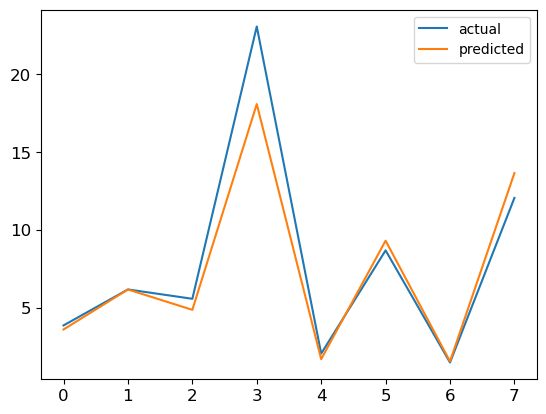

In [55]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Simple RNN

Simplest recurrent neural network

In [56]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.4430
Epoch 2/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4258
Epoch 3/30
1/1 [==============================] - 0s 11ms/step - loss: 0.4087
Epoch 4/30
1/1 [==============================] - 0s 0s/step - loss: 0.3915
Epoch 5/30
1/1 [==============================] - 0s 19ms/step - loss: 0.3743
Epoch 6/30
1/1 [==============================] - 0s 10ms/step - loss: 0.3572
Epoch 7/30
1/1 [==============================] - 0s 7ms/step - loss: 0.3400
Epoch 8/30
1/1 [==============================] - 0s 7ms/step - loss: 0.3228
Epoch 9/30
1/1 [==============================] - 0s 13ms/step - loss: 0.3058
Epoch 10/30
1/1 [==============================] - 0s 9ms/step - loss: 0.2887
Epoch 11/30
1/1 [==============================] - 0s 11ms/step - loss: 0.2715
Epoch 12/30
1/1 [==============================] - 0s 7ms/step - loss: 0.2544
Epoch 13/30
1/1 [==============================] - 0s 10ms/step - loss

### Predictions

In [58]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 163ms/step


In [59]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [60]:
comparison

,actual,predicted
0,3.88,3.422643
1,6.19,6.338694
2,5.59,4.575032
3,23.08,14.806972
4,2.07,1.838925
5,8.70,9.581570
6,1.50,1.689571
7,12.07,13.678566


In [61]:
MSE = mean_squared_error(comparison['actual'], comparison['predicted'])

In [62]:
performance = pd.concat([performance,pd.DataFrame({'model': 'simple RNN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,3.557738
0,simple RNN,9.144803


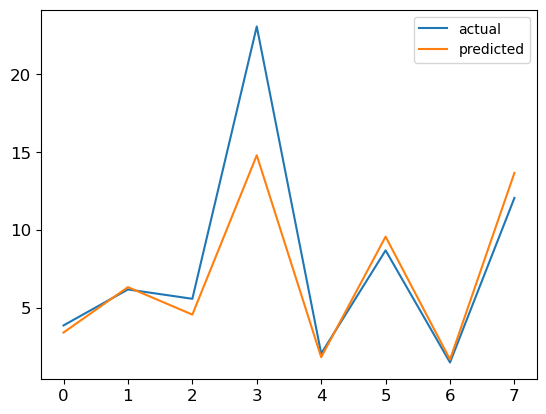

In [63]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

**Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training. However, if the output of RNN is sent to a DENSE layer, then a single value should be sent. That's why there is no "return sequences" right before DENSE layers.**

In [64]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.5591
Epoch 2/30
1/1 [==============================] - 0s 0s/step - loss: 0.5283
Epoch 3/30
1/1 [==============================] - 0s 0s/step - loss: 0.4986
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 0.4711
Epoch 5/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4458
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 0.4216
Epoch 7/30
1/1 [==============================] - 0s 0s/step - loss: 0.3992
Epoch 8/30
1/1 [==============================] - 0s 18ms/step - loss: 0.3765
Epoch 9/30
1/1 [==============================] - 0s 18ms/step - loss: 0.3557
Epoch 10/30
1/1 [==============================] - 0s 15ms/step - loss: 0.3394
Epoch 11/30
1/1 [==============================] - 0s 11ms/step - loss: 0.3231
Epoch 12/30
1/1 [==============================] - 0s 8ms/step - loss: 0.3058
Epoch 13/30
1/1 [==============================] - 0s 13ms/step - loss:

### Predictions

In [66]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 212ms/step


In [67]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [68]:
comparison

,actual,predicted
0,3.88,3.009932
1,6.19,6.591700
2,5.59,4.125100
3,23.08,14.033035
4,2.07,1.094199
5,8.70,9.492876
6,1.50,0.899972
7,12.07,12.525593


In [69]:
MSE = mean_squared_error(comparison['actual'], comparison['predicted'])

In [70]:
performance = pd.concat([performance,pd.DataFrame({'model': 'simple RNN with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,3.557738
0,simple RNN,9.144803
0,simple RNN with more layers,10.882540


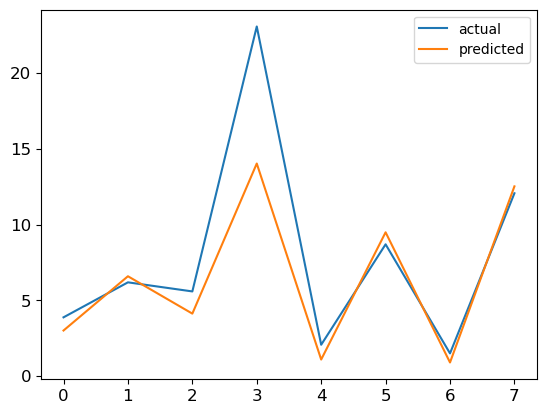

In [71]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [72]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [73]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.5272
Epoch 2/30
1/1 [==============================] - 0s 11ms/step - loss: 0.5117
Epoch 3/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4966
Epoch 4/30
1/1 [==============================] - 0s 11ms/step - loss: 0.4817
Epoch 5/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4670
Epoch 6/30
1/1 [==============================] - 0s 0s/step - loss: 0.4525
Epoch 7/30
1/1 [==============================] - 0s 2ms/step - loss: 0.4382
Epoch 8/30
1/1 [==============================] - 0s 17ms/step - loss: 0.4240
Epoch 9/30
1/1 [==============================] - 0s 17ms/step - loss: 0.4100
Epoch 10/30
1/1 [==============================] - 0s 0s/step - loss: 0.3961
Epoch 11/30
1/1 [==============================] - 0s 0s/step - loss: 0.3824
Epoch 12/30
1/1 [==============================] - 0s 17ms/step - loss: 0.3688
Epoch 13/30
1/1 [==============================] - 0s 18ms/step - loss: 

### Predictions

In [74]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 186ms/step


In [75]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [76]:
comparison

,actual,predicted
0,3.88,4.366466
1,6.19,6.018120
2,5.59,4.856723
3,23.08,9.034521
4,2.07,3.380432
5,8.70,7.360422
6,1.50,3.306136
7,12.07,10.119718


In [77]:
MSE = mean_squared_error(comparison['actual'], comparison['predicted'])

In [78]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM RNN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,3.557738
0,simple RNN,9.144803
0,simple RNN with more layers,10.882540
0,LSTM RNN,26.082099


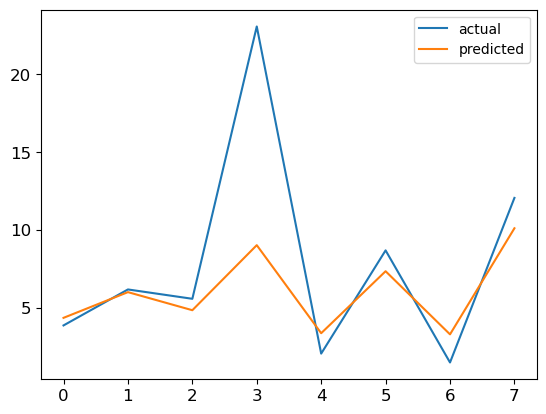

In [79]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [80]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [81]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 0.6192
Epoch 2/30
1/1 [==============================] - 0s 0s/step - loss: 0.5718
Epoch 3/30
1/1 [==============================] - 0s 15ms/step - loss: 0.5272
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 0.4850
Epoch 5/30
1/1 [==============================] - 0s 18ms/step - loss: 0.4450
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 0.4069
Epoch 7/30
1/1 [==============================] - 0s 17ms/step - loss: 0.3704
Epoch 8/30
1/1 [==============================] - 0s 17ms/step - loss: 0.3354
Epoch 9/30
1/1 [==============================] - 0s 17ms/step - loss: 0.3017
Epoch 10/30
1/1 [==============================] - 0s 17ms/step - loss: 0.2693
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 0.2381
Epoch 12/30
1/1 [==============================] - 0s 28ms/step - loss: 0.2085
Epoch 13/30
1/1 [==============================] - 0s 21ms/step -

### Predictions

In [82]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 764ms/step


In [83]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [84]:
comparison

,actual,predicted
0,3.88,3.565863
1,6.19,6.745664
2,5.59,4.513031
3,23.08,9.205884
4,2.07,1.509074
5,8.70,8.668756
6,1.50,1.304826
7,12.07,10.718234


In [85]:
MSE = mean_squared_error(comparison['actual'], comparison['predicted'])

In [86]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM RNN with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,3.557738
0,simple RNN,9.144803
0,simple RNN with more layers,10.882540
0,LSTM RNN,26.082099
0,LSTM RNN with more layers,24.529923


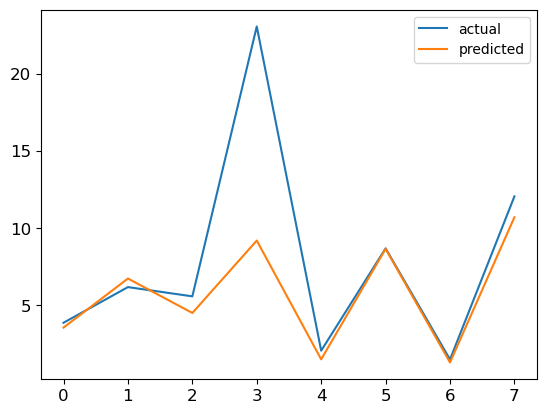

In [87]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [88]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [89]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.6842
Epoch 2/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6133
Epoch 3/30
1/1 [==============================] - 0s 14ms/step - loss: 0.5681
Epoch 4/30
1/1 [==============================] - 0s 14ms/step - loss: 0.5295
Epoch 5/30
1/1 [==============================] - 0s 11ms/step - loss: 0.4962
Epoch 6/30
1/1 [==============================] - 0s 4ms/step - loss: 0.4673
Epoch 7/30
1/1 [==============================] - 0s 12ms/step - loss: 0.4409
Epoch 8/30
1/1 [==============================] - 0s 14ms/step - loss: 0.4169
Epoch 9/30
1/1 [==============================] - 0s 14ms/step - loss: 0.3939
Epoch 10/30
1/1 [==============================] - 0s 13ms/step - loss: 0.3714
Epoch 11/30
1/1 [==============================] - 0s 12ms/step - loss: 0.3502
Epoch 12/30
1/1 [==============================] - 0s 6ms/step - loss: 0.3289
Epoch 13/30
1/1 [==============================] - 0s 11ms/step -

### Predictions

In [90]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 361ms/step


In [91]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [92]:
MSE = mean_squared_error(comparison['actual'], comparison['predicted'])

In [93]:
performance = pd.concat([performance,pd.DataFrame({'model': 'GRU with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,3.557738
0,simple RNN,9.144803
0,simple RNN with more layers,10.882540
0,LSTM RNN,26.082099
0,LSTM RNN with more layers,24.529923
0,GRU with more layers,26.335868


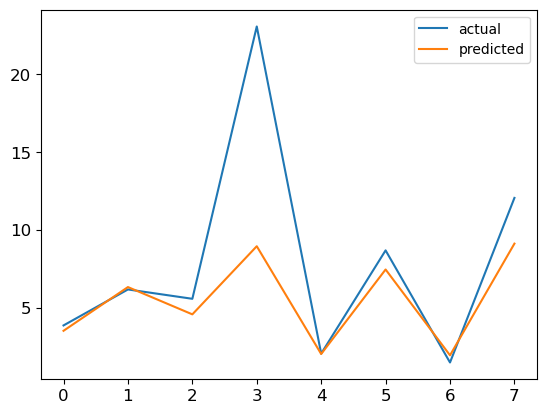

In [94]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

### Last Layer: GRU (you can change it to SimpleRNN or LSTM as well)

In [95]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [96]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.5910
Epoch 2/30
1/1 [==============================] - 0s 2ms/step - loss: 0.5521
Epoch 3/30
1/1 [==============================] - 0s 15ms/step - loss: 0.5145
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 0.4784
Epoch 5/30
1/1 [==============================] - 0s 17ms/step - loss: 0.4436
Epoch 6/30
1/1 [==============================] - 0s 17ms/step - loss: 0.4101
Epoch 7/30
1/1 [==============================] - 0s 0s/step - loss: 0.3792
Epoch 8/30
1/1 [==============================] - 0s 0s/step - loss: 0.3499
Epoch 9/30
1/1 [==============================] - 0s 20ms/step - loss: 0.3220
Epoch 10/30
1/1 [==============================] - 0s 13ms/step - loss: 0.2946
Epoch 11/30
1/1 [==============================] - 0s 17ms/step - loss: 0.2677
Epoch 12/30
1/1 [==============================] - 0s 0s/step - loss: 0.2414
Epoch 13/30
1/1 [==============================] - 0s 9ms/step - loss:

### Predictions

In [97]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 672ms/step


In [98]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [99]:
MSE = mean_squared_error(comparison['actual'], comparison['predicted'])

In [100]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Conv1D', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,3.557738
0,simple RNN,9.144803
0,simple RNN with more layers,10.882540
0,LSTM RNN,26.082099
0,LSTM RNN with more layers,24.529923
0,GRU with more layers,26.335868
0,Conv1D,15.001133


In [101]:
performance.sort_values(by='MSE')

,model,MSE
0,Normal NN,3.557738
0,simple RNN,9.144803
0,simple RNN with more layers,10.882540
0,Conv1D,15.001133
0,LSTM RNN with more layers,24.529923
0,LSTM RNN,26.082099
0,GRU with more layers,26.335868


As per the results above we can clearly say that Normal NN is the best model based on MSE. The lower the MSE the better the model performs. So among all the models Normal NN is the best model among others with 3.56 value.